In [52]:
#!pip install pyserial

In [15]:
import serial
from time import sleep
import cv2
import numpy as np
import sys
from matplotlib import pyplot as plt
from keras.models import load_model
%matplotlib inline
import re 
import struct

In [2]:
model = load_model('Our_Architecture.h5')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 222, 222, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
activation_2 (Activation)    (None, 109, 109, 32)      0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 52, 52, 32)        9248      
__________

In [3]:
def extractMax(input): 
  
     # get a list of all numbers separated by  
     # lower case characters  
     # \d+ is a regular expression which means 
     # one or more digit 
     # output will be like ['100','564','365'] 
    numbers = re.findall('\d+',input) 
    numbers = map(int,numbers) 
    return max(numbers) 

In [27]:
try:
    ser = serial.Serial('COM4', 9600)
except:
    ser.close()
    ser = serial.Serial('COM4', 9600)

while True:
    dist=str(ser.readline())
    dist=extractMax(dist)
    if dist > 0:
        video_capture = cv2.VideoCapture(0)
        if not video_capture.isOpened():
            raise Exception("Could not open video device")
        ret, frame = video_capture.read()
        video_capture.release()
        frameRGB = frame[:,:,::-1] # BGR => RGB
        plt.imshow(frameRGB)
        plt.title("Captured RGB Image")
        frameRGB=cv2.resize(frameRGB, (224,224)) 
        object_category=model.predict(frameRGB[np.newaxis,:,:,:])
        class_object=np.where(object_category==np.amax(object_category))[1][0]
        ser.write(struct.pack('>B', class_object))
    break
ser.close()

ValueError: max() arg is an empty sequence

In [22]:
class_object

1

In [150]:
test=cv2.imread("Canada_dry.jpg")[:,:,::-1]

In [41]:
test=cv2.resize(test, (224,224)) 

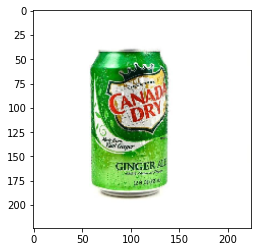

In [42]:
plt.imshow(test)

In [44]:
ans=model.predict(test[np.newaxis,:,:,:])

In [107]:
np.where(ans==np.amax(ans))[1][0]

1

In [121]:
ser.close()

In [118]:
dist

"b'\\n'"